# Importações

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff


from matplotlib import cm #colormap
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


%matplotlib inline 

## Visualização de gráficos 3d

### Minimizando a função 
$$f(x, y) = \frac {1} {3^{-x^2 - y ^ 2} + 1}$$

#### Minimizando
$$f(x,y) = \frac {1}{r+1}$$
Com $r$ igual a $3^{-x^2 - y ^ 2}$

In [2]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [3]:
#Gerando dados
x = np.linspace(start = -2, stop = 2, num = 200)
y = np.linspace(start = -2, stop = 2, num = 200)

x, y = np.meshgrid(x, y)


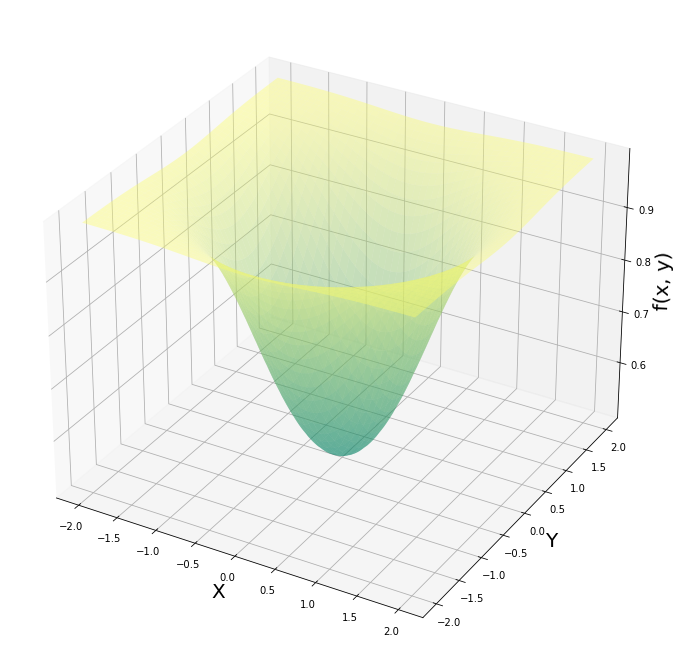

In [4]:
#Gerando grafico 3d


fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")

ax.plot_surface(x, y, f(x, y), cmap = cm.summer, alpha = 0.4)
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x, y)", fontsize = 20)

plt.show()

## Derivadas Parciais e Computação Simbolica

### $$ \frac {\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3 ^ {-x^2 - y^2}}{(3^{-x^2 -y^2} + 1)^2}$$

### $$ \frac {\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3 ^ {-x^2 - y^2}}{\left(3^{-x^2 -y^2} + 1\right)^2}$$

In [5]:
a, b = symbols("x, y")


print("Nossa função custo: ", f(a, b))
print("Derivada parcial de f(a, b) em relação a X: ", diff(f(a, b), a))

print("Valor de f(x, y) com x=1.8 e y=1: ", f(a,b).evalf(subs = {a:1.8, b:1}))

Nossa função custo:  1/(3**(-x**2 - y**2) + 1)
Derivada parcial de f(a, b) em relação a X:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Valor de f(x, y) com x=1.8 e y=1:  0.990604794032582


### Método do gradiente (Gradient descent) com Sympy

In [6]:
#Configuração inicial

multiplicador = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL



for n in range(max_iter):
    gradiente_x = diff(f(a,b), a).evalf(subs = {a:params[0], b:params[1]})
    gradiente_y = diff(f(a,b), b).evalf(subs = {a:params[0], b:params[1]})
    gradientes = np.array([gradiente_x, gradiente_y])
    
    
    params = params - multiplicador * gradientes

    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [0.000461440542096373 0.000256355856720208]
Menor valor de x:  0.000793898510134722
Menor valor de y:  0.000441054727852623
Custo:  0.500000226534985


In [7]:
#Derivadas parciais

def fpx(x, y):

    r = 3**(-x**2 - y**2)
    return (2 * x * log(3) * r) / ((r + 1) ** 2)
    
def fpy(x, y):
    
    r = 3**(-x**2 - y**2)
    return (2 * y * log(3) * r) / ((r + 1) ** 2)


In [8]:
# Configuração inicial

multiplicador = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL



for n in range(max_iter):
    gradiente_x = fpx(params[0], params[1])
    gradiente_y = fpy(params[0], params[1])
    gradientes = np.array([gradiente_x, gradiente_y])
    
    
    params = params - multiplicador * gradientes

    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [0.00046144 0.00025636]
Menor valor de x:  0.0007938985101347202
Menor valor de y:  0.0004410547278526219
Custo:  0.5000002265349848


## Plotando método gradiente no grafico 3D & Vetores numpy avançados

In [9]:
# Configuração inicial

multiplicador = 0.5
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL
valores = params.reshape(1, 2)


for n in range(max_iter):
    
    gradiente_x = fpx(params[0], params[1])
    gradiente_y = fpy(params[0], params[1])
    gradientes = np.array([gradiente_x, gradiente_y])
    
    params = params - multiplicador * gradientes
    valores = np.append(valores, params.reshape(1,2), axis = 0)
    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [1.56952449e-26 8.71958048e-27]
Menor valor de x:  2.0725232663390205e-26
Menor valor de y:  1.1514018146327904e-26
Custo:  0.5


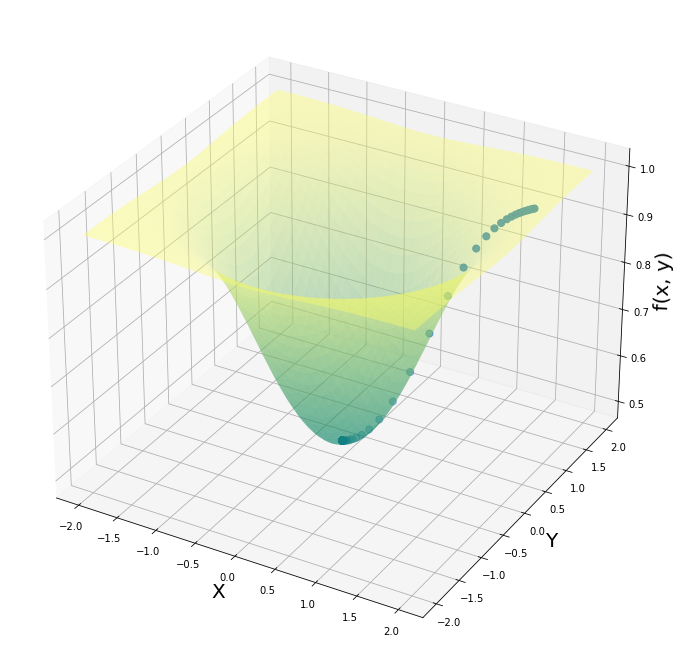

In [10]:
#Gerando grafico 3d


fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")


ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x, y)", fontsize = 20)


ax.plot_surface(x, y, f(x, y), cmap = cm.summer, alpha = 0.4)
ax.scatter(valores[:, 0], valores[:, 1], f(valores[:, 0], valores[:,1]), s = 50)



plt.show()

In [11]:
#Praticando numpy arrays



kirk = np.array([["Captain", "MC"]])


hs_band = np.array([["Black Thought", "MC"], ["Questlove", "Drums"]])
print("band>>>>", hs_band.shape)

the_roots = np.append(arr = hs_band, values = kirk, axis = 0)


the_roots = np.append(arr = the_roots, values = [["Malik B", "MC"]], axis = 0)
print(the_roots)

print("Nicknames...")
print(the_roots[:, [0]])
print("Funçoes...")
print(the_roots[:, [1]])

band>>>> (2, 2)
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'MC']
 ['Malik B' 'MC']]
Nicknames...
[['Black Thought']
 ['Questlove']
 ['Captain']
 ['Malik B']]
Funçoes...
[['MC']
 ['Drums']
 ['MC']
 ['MC']]


# Trabalhando com Dados e uma função custo real

## MSE: Uma função custo para problemas reais

### $$ RSS = \sum_{i=1} ^ {n} \big(y ^ {(i)} - h_\theta x^{(i)}\big)^2$$
### $$ MSE = \sum_{i=1} ^ {n} \big(y - \hat y \big)^2$$
### $$ MSE = \frac{1}{n} \sum_{i=1} ^ {n} \big(y ^ {(i)} - h_\theta x^{(i)}\big)^2$$
### $$ MSE = \frac{1}{n} \sum_{i=1} ^ {n} \big(y - \hat y \big)^2$$

In [12]:
#Criando valores

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)


print("x_5 shape: ", x_5.shape)
print("y_5 shape: ", y_5.shape)

x_5 shape:  (7, 1)
y_5 shape:  (7, 1)


In [13]:
regr = LinearRegression()
regr.fit(x_5, y_5)

print("Theta 0: ", regr.intercept_[0])
print("Theta 1: ", regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


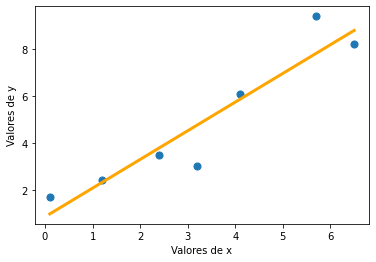

In [14]:
plt.scatter(x_5, y_5, s= 50)
plt.plot(x_5, regr.predict(x_5), color= "orange", linewidth = 3)

plt.xlabel("Valores de x")
plt.ylabel("Valores de y")

plt.show()

In [15]:
#y_hat = theta0 + theta1 * x
print(regr.coef_[0][0])
print(regr.intercept_[0])
y_hat = 0.8475351486029536 + (1.2227264637835915 * x_5)


1.2227264637835915
0.8475351486029536


In [16]:
def mse(y, y_hat):
    return (1/len(y)) * (sum((y - y_hat) ** 2))

In [17]:
print("MSE calculado manualmente: ", mse(y_5, y_hat))
print("MSE usando calculo manual: ", mean_squared_error(y_5, y_hat))
print("MSE calculado automaticamente: ", mean_squared_error(y_5, regr.predict(x_5)))

MSE calculado manualmente:  [0.94796558]
MSE usando calculo manual:  0.9479655759794577
MSE calculado automaticamente:  0.9479655759794577


In [18]:
#Criando valores de Theta0 e Theta1
#LEMBRANDO QUE: T0 é a intercessão e T1 é o coeficiente angula

In [19]:
n_tetas = 200
t_0 = np.linspace(start= -1, stop = 3, num = n_tetas)
t_1 = np.linspace(start= -1, stop = 3, num = n_tetas)


plot_t0, plot_t1 = np.meshgrid(t_0, t_1)
plot_mse = np.zeros(plot_t0.shape)


In [20]:
for i in range(n_tetas):
    for j in range(n_tetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5

        plot_mse[i][j] = mse(y_5, y_hat)


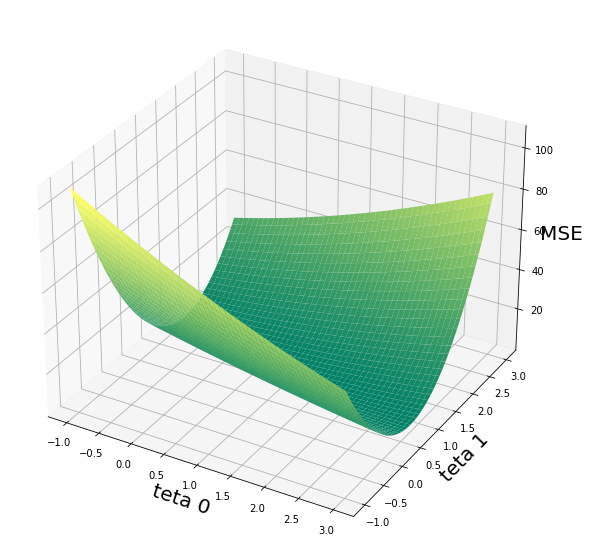

In [21]:
fig = plt.figure(figsize=[16,10])
ax = fig.gca(projection = "3d")

ax.set_xlabel("teta 0", fontsize = 20)
ax.set_ylabel("teta 1", fontsize = 20)
ax.set_zlabel("MSE", fontsize = 20)


ax.plot_surface(plot_t0, plot_t1, plot_mse, cmap = cm.summer)

## Derivadas parciais em respeito a $\theta_0$ e a $\theta_1$:


### $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$
### $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \cdot \big(x^{(i)}\big) $$

### MSE e Gradient Descent

In [22]:
def grad(x, y, tetas):
    n = y.size
    
    t0_derivada = (-2/n) * sum(y - tetas[0] - tetas[1] * x)
    t1_derivada = (-2/n) * sum((y - tetas[0] - tetas[1] * x) * x)
    
    
    return np.array([t0_derivada[0], t1_derivada[0]])

In [23]:
max_iter = 1000
multiplicador = 0.01
tetas = np.array([2.9, 2.9])
teta_valores = tetas.reshape(1,2)
mse_valores = mse(y_5, tetas[0] + tetas[1]*x_5)


for i in range(max_iter):
    tetas = tetas - multiplicador * grad(x_5, y_5, tetas)
    
    teta_valores = np.append(arr = teta_valores, values = tetas.reshape(1,2), axis = 0)
    mse_valores = np.append(arr = mse_valores, values = mse(y_5, tetas[0] + tetas[1]*x_5), axis = 0)


    
print("Minimo ocorre em t0:  ", tetas[0])
print("Minimo ocorre em t1 : ", tetas[1])
print("MSE: ", mse(y_5, tetas[0] + tetas[1] * x_5))

Minimo ocorre em t0:   0.8532230461743415
Minimo ocorre em t1 :  1.2214935332607393
MSE:  [0.94797511]


Text(0.5, 0, 'Cost - MSE')

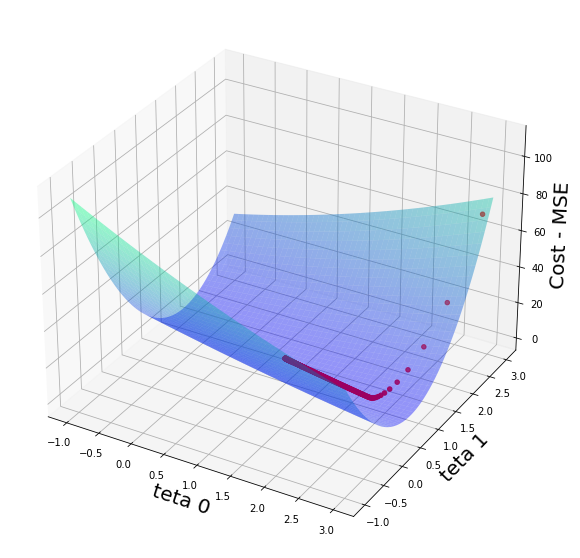

In [24]:
fig = plt.figure(figsize=[16,10])
ax = fig.gca(projection = "3d")


ax.plot_surface(plot_t0, plot_t1, plot_mse, cmap = cm.winter, alpha = 0.4)
ax.scatter(teta_valores[:, 0], teta_valores[:, 1], mse_valores, color = "red")

ax.set_xlabel("teta 0", fontsize = 20)
ax.set_ylabel("teta 1", fontsize = 20)
ax.set_zlabel("Cost - MSE", fontsize = 20)